# Graduate Admission Data Analysis

## Dataset Description

This dataset was obtained from https://www.kaggle.com/mohansacharya/graduate-admissions. The specific file I used for
analysis is Admission_Predict.csv.

The main source of credibility is that this dataset was selected for presentation at IEEE International Conference
on Computational Intelligence in Data Science 2019.

The author noted that the dataset was a sample of engineering students, and that it is created for the prediction
of Graduate Admissions from an Indian perspective. There were 400 participants in total.

Features in the dataset:

    GRE Scores (290 to 340)
    TOEFL Scores (92 to 120)
    University Rating (1 to 5)
    Statement of Purpose (1 to 5)
    Letter of Recommendation Strength (1 to 5)
    Undergraduate CGPA (6.8 to 9.92)
    Research Experience (0 or 1)
    Chance of Admit (0.34 to 0.97)

## Read in and Clean Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Save the file path as a variable
nycFile_path = "file:///Users/jkramer/Documents/GitHub/python_data_analysis/Datasets/Admission_Predict.csv"

# Read in the csv as a pandas dataframe
df = pd.read_csv(nycFile_path, header=0)
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
# Replace spaces from columns headers
df.columns = [c.replace(' ', '_') for c in df.columns]

In [4]:
df.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Check for nulls: no nulls found
df.isnull().sum()

Serial_No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

In [6]:
# Drop serial no. column
df = df.drop(columns='Serial_No.')

In [7]:
# Encode Research Column
df['GRE_Score'].min()

290

In [8]:
df['GRE_Score'].max()

340

In [9]:
# Bin GRE Scores
bins = list(range(290, 350, 10))
bins

[290, 300, 310, 320, 330, 340]

In [10]:
df['GRE_Score_bins'] = pd.cut(df.GRE_Score, bins=bins, labels=["290-300", "300-310", "310-320", "320-330", "330-340"])
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_,GRE_Score_bins
0,337,118,4,4.5,4.5,9.65,1,0.92,330-340
1,324,107,4,4.0,4.5,8.87,1,0.76,320-330
2,316,104,3,3.0,3.5,8.00,1,0.72,310-320
3,322,110,3,3.5,2.5,8.67,1,0.80,320-330
4,314,103,2,2.0,3.0,8.21,0,0.65,310-320


## Exploratory Data Analysis

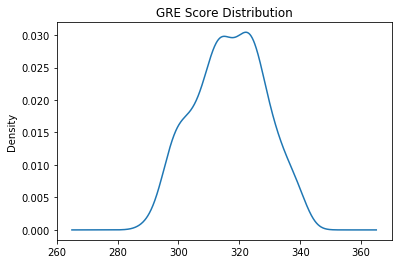

In [11]:
# Examine distribution of 4 columns
%matplotlib inline
df.GRE_Score.plot(kind='density', title='GRE Score Distribution')

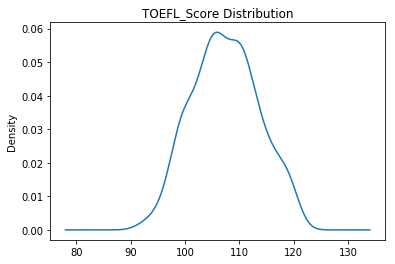

In [12]:
%matplotlib inline
df.TOEFL_Score.plot(kind='density', title='TOEFL_Score Distribution')

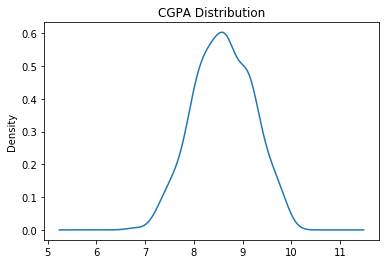

In [13]:
%matplotlib inline
df.CGPA.plot(kind='density', title='CGPA Distribution')

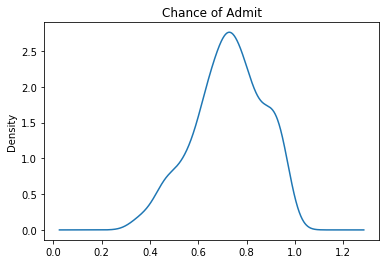

In [14]:
%matplotlib inline
df.Chance_of_Admit_.plot(kind='density', title='Chance of Admit')

In [15]:
# Normalize 4 columns
from sklearn import preprocessing
import numpy as np

In [16]:
df_list = df[["GRE_Score", "TOEFL_Score", "CGPA", "Chance_of_Admit_"]]

In [17]:
df_list.dtypes

GRE_Score             int64
TOEFL_Score           int64
CGPA                float64
Chance_of_Admit_    float64
dtype: object

In [18]:
df_list.GRE_Score = df_list.GRE_Score.astype(float)
df_list.TOEFL_Score = df_list.TOEFL_Score.astype(float)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [19]:
standard_scaler = preprocessing.StandardScaler()

In [20]:
df_std = pd.DataFrame(standard_scaler.fit_transform(df_list))

In [21]:
df_std.head()

,0,1,2,3
0,1.762107,1.746971,1.764818,1.373648
1,0.627656,-0.067635,0.455151,0.250297
2,-0.070467,-0.562528,-1.005631,-0.030541
3,0.453126,0.427257,0.119339,0.531135
4,-0.244998,-0.727492,-0.653029,-0.522007


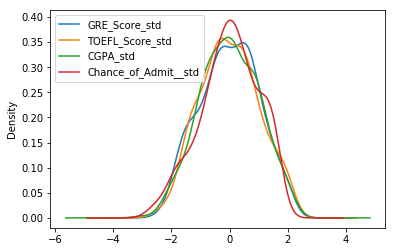

In [22]:
df_std.columns = [str(x) + "_std" for x in df_list.columns]
df_std.plot(kind='density')

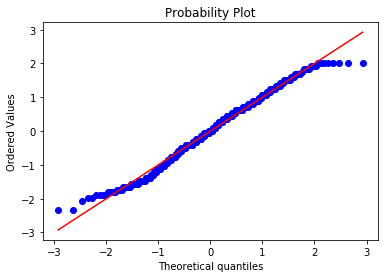

In [23]:
# Create QQ Plots for 4 columns
import scipy.stats as stats
stats.probplot(df_std.GRE_Score_std, dist="norm", plot=plt)
plt.show()

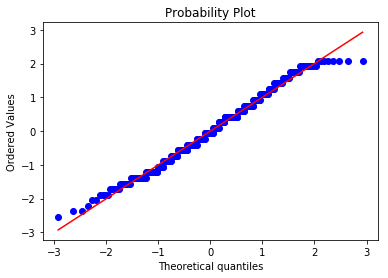

In [24]:
import scipy.stats as stats
stats.probplot(df_std.TOEFL_Score_std, dist="norm", plot=plt)
plt.show()

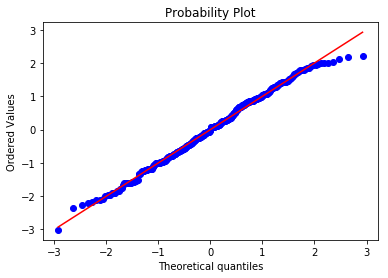

In [25]:
import scipy.stats as stats
stats.probplot(df_std.CGPA_std, dist="norm", plot=plt)
plt.show()

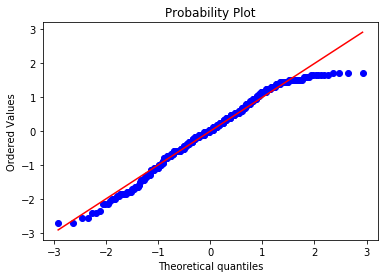

In [26]:
import scipy.stats as stats
stats.probplot(df_std.Chance_of_Admit__std, dist="norm", plot=plt)
plt.show()

In [27]:
# Examine and plot correlation between all variables
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

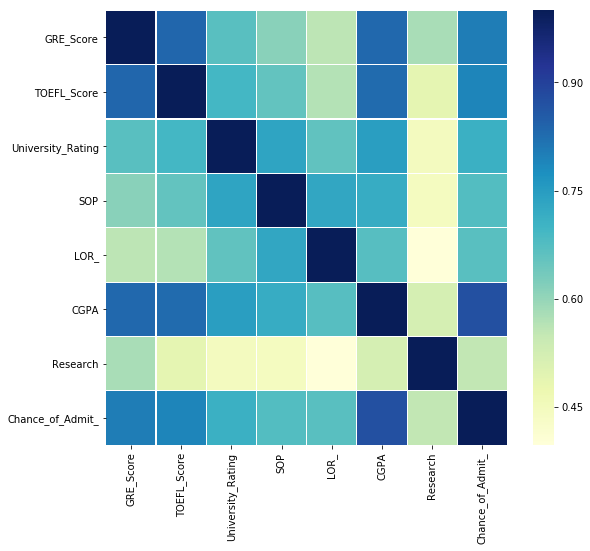

In [28]:
corr_mat = df.corr()
f, ax = plt.subplots(figsize = (9, 8))
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [29]:
# Examine correlation between GRE score/GPA and Chance of Admit
df_list[['Chance_of_Admit_', 'GRE_Score']].corr()

,Chance_of_Admit_,GRE_Score
Chance_of_Admit_,1.00000,0.80261
GRE_Score,0.80261,1.00000


In [30]:
df_list[['Chance_of_Admit_', 'CGPA']].corr()

,Chance_of_Admit_,CGPA
Chance_of_Admit_,1.000000,0.873289
CGPA,0.873289,1.000000


In [31]:
# Test for outliers
from scipy.stats import zscore

In [32]:
df["Chance_of_Admit_Z"] = zscore(df.Chance_of_Admit_)

In [33]:
len(df[abs(df.Chance_of_Admit_Z) > 2.5])

4

In [34]:
df["CGPA_Z"] = zscore(df.CGPA)

In [35]:
len(df[abs(df.CGPA_Z) > 2.5])

1

In [36]:
df["TOEFL_Score_Z"] = zscore(df.TOEFL_Score)

In [37]:
len(df[abs(df.TOEFL_Score_Z) > 2.5])

1

In [38]:
df["GRE_Score_Z"] = zscore(df.GRE_Score)

In [39]:
len(df[abs(df.GRE_Score_Z) > 2.5])

0

In [40]:
#Removal of outliers for select columns
df2 = df[abs(df.Chance_of_Admit_Z) < 2.5]
df2 = df2[abs(df.CGPA_Z) < 2.5]
df2 = df2[abs(df.TOEFL_Score_Z) < 2.5]
df2 = df2[abs(df.GRE_Score_Z) < 2.5]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


## Linear Regression

In [41]:
# Load features: in this case, I decided to use the original dataset because there are so few outliers
# and columns are roughly normally distributed
df_x = pd.DataFrame(df.drop(columns=['Chance_of_Admit_', 'Chance_of_Admit_Z', 'CGPA_Z','GRE_Score_Z', 'TOEFL_Score_Z', 'GRE_Score_bins']))

In [42]:
df_x.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [43]:
df_y = pd.DataFrame(df["Chance_of_Admit_"])

In [44]:
df_y.head()

,Chance_of_Admit_
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


Text(0.5, 1.0, 'GRE Score and Chance of Admission')

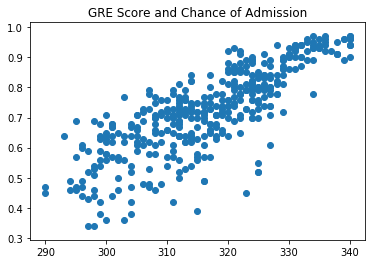

In [45]:
# Plot each column against target
plt.scatter(df_x.GRE_Score, df_y.Chance_of_Admit_)
plt.title("GRE Score and Chance of Admission")

Text(0.5, 1.0, 'TOEFL Score and Chance of Admission')

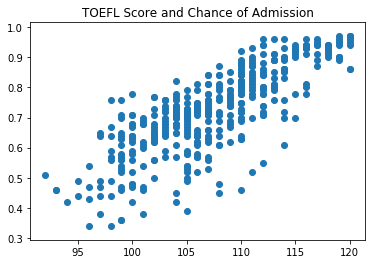

In [46]:
plt.scatter(df_x.TOEFL_Score, df_y.Chance_of_Admit_)
plt.title("TOEFL Score and Chance of Admission")

Text(0.5, 1.0, 'SOP and Chance of Admission')

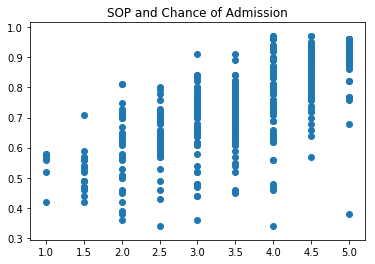

In [47]:
plt.scatter(df_x.SOP, df_y.Chance_of_Admit_)
plt.title("SOP and Chance of Admission")

Text(0.5, 1.0, 'LOR and Chance of Admission')

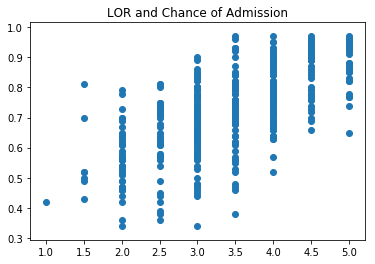

In [48]:
plt.scatter(df_x.LOR_, df_y.Chance_of_Admit_)
plt.title("LOR and Chance of Admission")

Text(0.5, 1.0, 'CGPA and Chance of Admission')

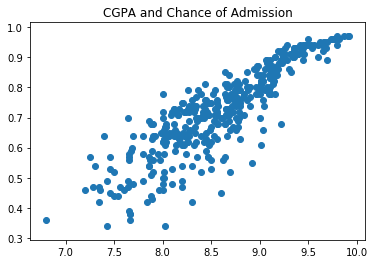

In [49]:
plt.scatter(df_x.CGPA, df_y.Chance_of_Admit_)
plt.title("CGPA and Chance of Admission")

Text(0.5, 1.0, 'Research and Chance of Admission')

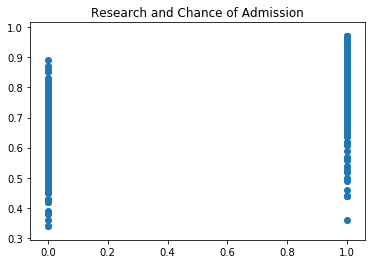

In [50]:
plt.scatter(df_x.Research, df_y.Chance_of_Admit_)
plt.title("Research and Chance of Admission")

In [52]:
# Drop research column because binary
df_x = df_x.drop(columns='Research')

In [53]:
# CGPA showed highest correlation among scatterplots, so this is chosen for linear regression
df_x = df_x[["CGPA"]]

In [54]:
# Create training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=6)

In [56]:
fit = lr.fit(x_train, y_train)

In [57]:
lr.intercept_

array([-1.0204731])

In [58]:
coef_df = pd.DataFrame({"feature": "CGPA", 
                        "coeff": int(fit.coef_)},
                      index=[0])

In [59]:
coef_df

,feature,coeff
0,CGPA,0


In [60]:
preds = lr.predict(x_test)

In [61]:
preds[0:5]

array([[0.63018303],
       [0.73589007],
       [0.93104153],
       [0.82126883],
       [0.58139516]])

Text(0, 0.5, 'Predictions')

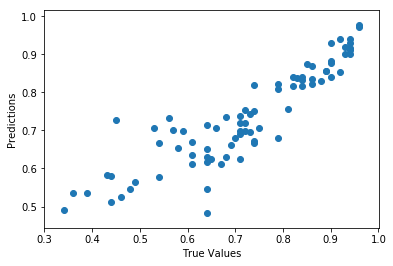

In [62]:
# Plot predicted vs actual
plt.scatter(y_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

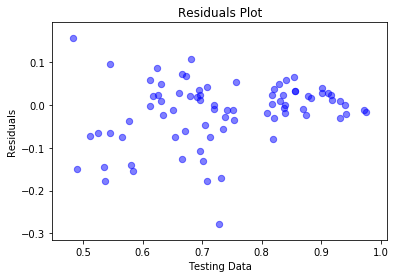

In [63]:
# Plot residuals
residuals = y_test - preds
plt.scatter(lr.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [64]:
# Residuals map could be improved by removing outliers, standardizing/scaling data, and increasing sample size

In [65]:
# 3 main error methods
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, preds)
MAE

0.053693346361464875

In [66]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds) # calculate mean squared error
rmse = np.sqrt(mse) # calcualate root mean squared error
rmse

0.07526809620765003

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.780613892079095

## Conclusion

In [68]:
# Checking p-value of linear regression model
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.496001
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       Chance_of_Admit_   No. Observations:                  320
Model:                          Logit   Df Residuals:                      319
Method:                           MLE   Df Model:                            0
Date:                Sun, 19 Jan 2020   Pseudo R-squ.:                  -2.256
Time:                        22:03:49   Log-Likelihood:                -158.72
converged:                       True   LL-Null:                       -48.754
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CGPA           0.1174      0.015      7.984      0.000       0.089       0.146


The p-value is well below 0.05 (0.000 above), which indicates that there is very little chance that the null hypothesis is true.
In this case, the null hypothesis would be the scenario where the correlation between College GPA and Chance
of Admit is a result of chance. Because the p-value is so low, this indicates that it is very unlikely
that the correlation between College GPA and Chance of Admit are a result of chance.

This indicates that higher College GPA's are positively correlated with a higher Chance of Admit on average, as suggested in the 
plot below, showing a trend where the highest GPA students having the highest chance of admission.

Taking the low p-value into account, along with the fairly high r-squared value of 0.78, it is safe to state that,
an increase in College GPA is likely to coincide with an increase in Chance of Admission for students of this dataset.

Text(0.5, 1.0, 'CGPA and Chance of Admission')

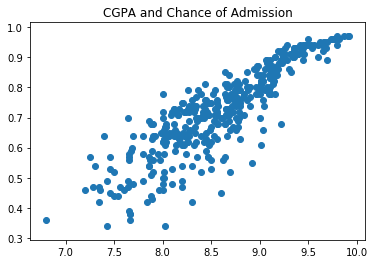

In [69]:
plt.scatter(df_x.CGPA, df_y.Chance_of_Admit_)
plt.title("CGPA and Chance of Admission")

Additionally, the scatterplot of GRE Score against Chance of Admission, as well as TOEFL Score against Chance of Admission,indicate that there may be a correlation between the two pairs of variables below. These would also be strong candidates for linear regression, and worth testing in future studies.

Text(0.5, 1.0, 'GRE Score and Chance of Admission')

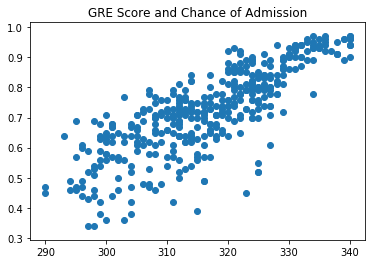

In [70]:
plt.scatter(df.GRE_Score, df_y.Chance_of_Admit_)
plt.title("GRE Score and Chance of Admission")

Text(0.5, 1.0, 'TOEFL Score and Chance of Admission')

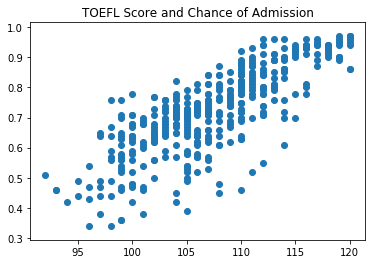

In [71]:
plt.scatter(df.TOEFL_Score, df_y.Chance_of_Admit_)
plt.title("TOEFL Score and Chance of Admission")

Based on the linear regression and scatterplots above, it is clear that there is a correlation between College GPA
and Chance of Admission, and GRE Score and TOEFL score also seem to coincide with a higher Chance of Admission.
Additionally, according to the heatmap shown in the EDA section, it appears there may be additional variables
that coincide with a higher Chance of Admission.

At this point, one might be curious if a higher College GPA would coincide with a higher Chance of Admission
for students beyond those included in this dataset. While this might well be expected, I would be hesitant to
generalize the findings of my linear regression model and analysis to any student applying for Masters programs.
The reason for this is because graduate programs vary in many ways in their methods and standards for admission.
While College GPA was correlated with a higher Chance of Admission for the students in this dataset, there needs to
be much more research performed on a greater variety of students and graduate programs before any kind of general
statements can be made about how students can have a high chance of admitted to Masters programs.

The main finding of this analysis is that increasing the College GPA led to a higher Chance of Admission for
for the students in this dataset, and the method I used to generate this model could be replicated to measure
the relationship between other variables in this dataset against Chance of Admission. This would add to the knowledge
generated from this project, and help us understand which factors influence graduate admission the students in this
dataset. From there, these methods could be applied to other datasets of students applying to a variety of
graduate programs, and further insights and knowledge could be generated about graduate admission chances for
students of many different backgrounds and performance levels.